In [38]:
from sklearn.model_selection import KFold
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

In [39]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker, cm
from mpl_toolkits import mplot3d

from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [15]:
import json, codecs
import numpy as np
import pickle

_vector_encoder_train = json.loads(codecs.open('vector_encoder_train.json', 'r', encoding='utf-8').read())
vector_encoder_train = np.array(_vector_encoder_train)

_vector_encoder_test = json.loads(codecs.open('vector_encoder_test.json', 'r', encoding='utf-8').read())
vector_encoder_test = np.array(_vector_encoder_test)

_X_train = json.loads(codecs.open('X_train.json', 'r', encoding='utf-8').read())
X_train = [np.array(_X_train)]

_X_test = json.loads(codecs.open('X_test.json', 'r', encoding='utf-8').read())
X_test = [np.array(_X_test)]

y_train = json.loads(codecs.open('y_train.json', 'r', encoding='utf-8').read())

y_test = json.loads(codecs.open('y_test.json', 'r', encoding='utf-8').read())

In [16]:
def true_classes(test_label):

    true_classes_list = []
    for i in test_label:
        if i == 0:
            true_classes_list.append("News")
        elif i == 1:
            true_classes_list.append("Resume")
        elif i == 2:
            true_classes_list.append("Scientific")
    return true_classes_list

def predicted_classes(model, test_label):

    predicted_list = []
    for i in model.predict(test_label):
        if i == 0:
            predicted_list.append("News")
        elif i == 1:
            predicted_list.append("Resume")
        elif i == 2:
            predicted_list.append("Scientific")

    return predicted_list


In [17]:
true_classes = true_classes(y_test)

### One-vs-Rest

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

def OVR_model(image_features, labels):

    ovr = OneVsRestClassifier(SVC())
    ovr.fit(image_features, np.array(labels))

    return ovr

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score

ovr = OVR_model(vector_encoder_train, y_train)
OVR_predict_classes = predicted_classes(ovr, vector_encoder_test)

ovr_accuracy = accuracy_score(true_classes, OVR_predict_classes) * 100
print('Accuracy for One-vs-Rest Classifier: ', ovr_accuracy, '%')

Accuracy for One-vs-Rest Classifier:  74.08491947291361 %


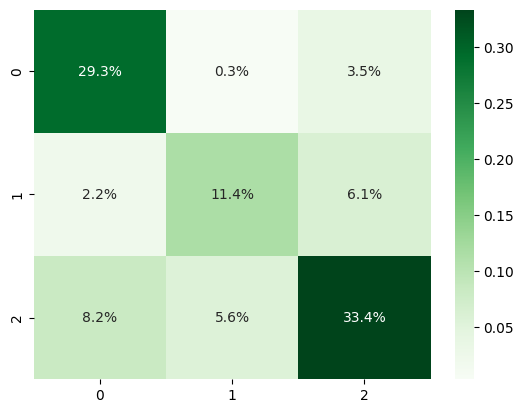

In [20]:
import seaborn as sns
labels=['News', 'Resume', 'Scientific']

OVR_cf_matrix = confusion_matrix(true_classes, OVR_predict_classes, labels=labels)
OVR_cf_matrix_heatmap = sns.heatmap(OVR_cf_matrix/np.sum(OVR_cf_matrix), annot=True, fmt='.1%', cmap='Greens')



In [21]:
# model = ovr
# filename = 'finalized_OVR_model.sav'
# pickle.dump(model, open(filename, 'wb'))

### Logistic Regression

In [40]:
from sklearn.metrics import classification_report

In [49]:
parameters = {'C':[ 1, 2, 5, 10, 50, 100]}
              # 'penalty': ['l1', 'l2'],
#               'solver': ['newton-cg', 'newton-cholesky', 'sag', 'saga']}
lr = LogisticRegression(multi_class='multinomial')
grid_p = GridSearchCV(lr, parameters, cv=5)
grid_p.fit(vector_encoder_train, y_train)
print(grid_p.best_params_)

{'C': 1}


In [50]:
logreg_p = LogisticRegression(C = grid_p.best_params_['C'],
                              penalty='l1', tol=0.01, solver='saga', multi_class='multinomial')
logreg_p.fit(vector_encoder_train, y_train)
logreg_predict_classes = predicted_classes(logreg_p, vector_encoder_test)

logreg_accuracy = accuracy_score(true_classes, logreg_predict_classes) * 100
print('Accuracy for Logistic Regression Classifier: ', logreg_accuracy, '%')

Accuracy for Logistic Regression Classifier:  67.05710102489019 %


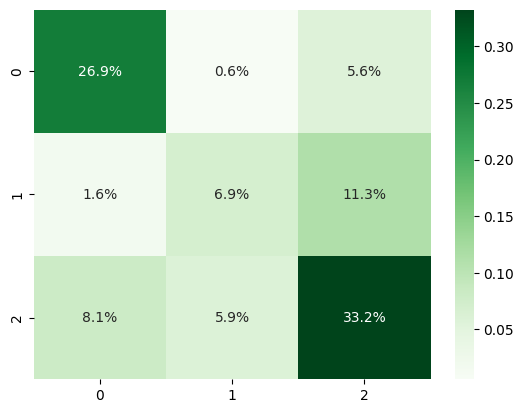

In [51]:
import seaborn as sns
labels=['News', 'Resume', 'Scientific']

logreg_cf_matrix = confusion_matrix(true_classes, logreg_predict_classes, labels=labels)
logreg_cf_matrix_heatmap = sns.heatmap(logreg_cf_matrix/np.sum(logreg_cf_matrix), annot=True, fmt='.1%', cmap='Greens')



### SVM

In [26]:
parameters = {'C':[ 1, 2, 5, 10, 50, 100]}
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)
grid_p = GridSearchCV(svm, parameters, cv=5)
grid_p.fit(vector_encoder_train, y_train)

svm_1 = SVC(kernel='rbf', random_state=0, gamma=0.1, C=grid_p.best_params_['C'], probability=True)
svm_1.fit(vector_encoder_train, y_train)

SVC(C=100, gamma=0.1, probability=True, random_state=0)

In [27]:
svm_1_predict_classes = predicted_classes(svm_1, vector_encoder_test)

svm_1_accuracy = accuracy_score(true_classes, svm_1_predict_classes) * 100
print('Accuracy for SVM Classifier: ', svm_1_accuracy, '%')

Accuracy for SVM Classifier:  92.53294289897511 %


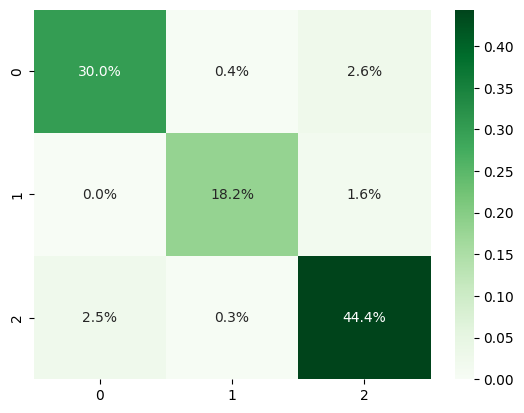

In [28]:
labels=['News', 'Resume', 'Scientific']

svm_cf_matrix = confusion_matrix(true_classes, svm_1_predict_classes, labels=labels)
svm_cf_matrix_heatmap = sns.heatmap(svm_cf_matrix/np.sum(svm_cf_matrix), annot=True, fmt='.1%', cmap='Greens')

In [29]:
y_pred_svm = svm_1.predict(vector_encoder_test)
# target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred_svm, target_names=labels))

              precision    recall  f1-score   support

        News       0.92      0.91      0.92       226
      Resume       0.96      0.92      0.94       135
  Scientific       0.91      0.94      0.93       322

    accuracy                           0.93       683
   macro avg       0.93      0.92      0.93       683
weighted avg       0.93      0.93      0.93       683



In [30]:
model = svm_1
filename = 'SVM_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [31]:
from DocClf_Test_Preprocessing import *
image_path = r"C:\Users\i\Documents\PROJECTS\SPM_docs\model_docs\flaskDocProject\images\cv.tif"
encoded_image = Preprocess(image_path).vector_encoder()

print(svm_1.predict_proba(encoded_image))

[[0.00081246 0.7202281  0.27895944]]


In [32]:
print(encoded_image)

[[-0.79573333  0.         -0.94172937 -1.995053    0.          0.
  -0.30263638 -0.05420605 -0.9584866  -0.76561385  0.15743962 -1.2586011
   0.4451117   0.07392213  1.2341416 ]]


In [33]:
from DocClf_Test_Preprocessing import *
image_path = r"C:\Users\i\Documents\PROJECTS\SPM_docs\model_docs\flaskDocProject\images\03620726.tif"
encoded_image = Preprocess(image_path).vector_encoder()

print(svm_1.predict_proba(encoded_image))

[[9.99859441e-01 4.92559518e-06 1.35632958e-04]]


In [34]:
print(encoded_image)

[[ 0.10463234  0.          1.5482721   0.68542194  0.          0.
  -0.30263638 -0.05420605  0.95611346  1.1467142  -2.166598    1.9117452
  -1.6436827  -1.1088319  -1.0535043 ]]


In [35]:
# C:\Users\i\Documents\PROJECTS\SPM_docs\docs\docs_path\Resume\50463741-3741.tif
from DocClf_Test_Preprocessing import *
image_path = r"C:\Users\i\Documents\PROJECTS\SPM_docs\docs\docs_path\Resume\50463741-3741.tif"
encoded_image_1 = Preprocess(image_path).vector_encoder()

print(svm_1.predict_proba(encoded_image_1))

[[0.00728511 0.75240401 0.24031089]]


In [36]:
print(encoded_image)

[[ 0.10463234  0.          1.5482721   0.68542194  0.          0.
  -0.30263638 -0.05420605  0.95611346  1.1467142  -2.166598    1.9117452
  -1.6436827  -1.1088319  -1.0535043 ]]


In [37]:
print(svm_1.predict_proba([vector_encoder_train[0]]))
print(vector_encoder_train[0])

[[0.02801507 0.77083955 0.20114538]]
[ 0.15120053  0.         -1.24651718  1.01153564  0.          0.
 -0.35948592 -0.05420605 -1.34435034 -0.27829435  2.93395066 -0.82241172
  2.03540492  1.83913064  1.63705111]
